In [1]:
import experiment
import models

from experiment import *

In [2]:
sim = Exp()
concs = np.geomspace(1, 100, 10)
concs = [c*1e-6 for c in concs]
for c in concs:
    sim.add_dataset(np.linspace(0,1000,1000), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(0, 500, c)
    sim.datasets[-1].add_step(500, 1000, 0)



In [3]:
sim.model = models.One_to_one()
sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [4]:
sim.params['ka'].value = 4689.16873
sim.params['kd'].value = 0.03867410
sim.params['ymax'].value = 0.25000000

ymax = sim.params['ymax'].value

In [5]:
sim.params

name,value,initial value,min,max,vary
ka,4689.16873,10000.0,10.0000000,10000000.0,True
kd,0.03867410,0.01,1.0000e-06,0.10000000,True
ymax,0.25000000,1,1.0000e-12,1000.00000,True


In [6]:
sim.simulate_response(None, 0, 0)

In [7]:
# idx = np.random.choice(len(xs), size=2)
# xs2 = [xs[i] for i in idx]
# xs2 = [ys[i] for i in idx]


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

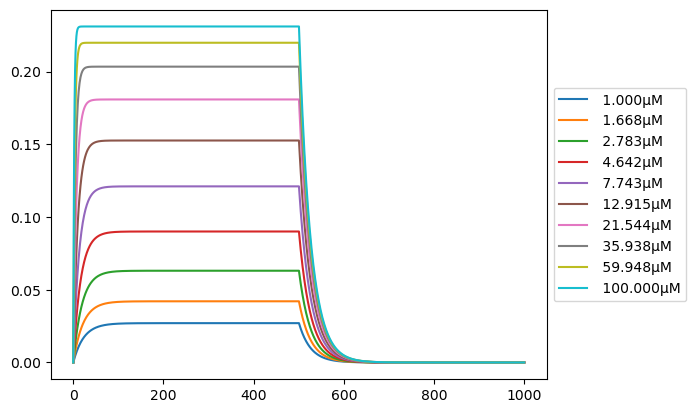

In [8]:
sim.plot()

In [9]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


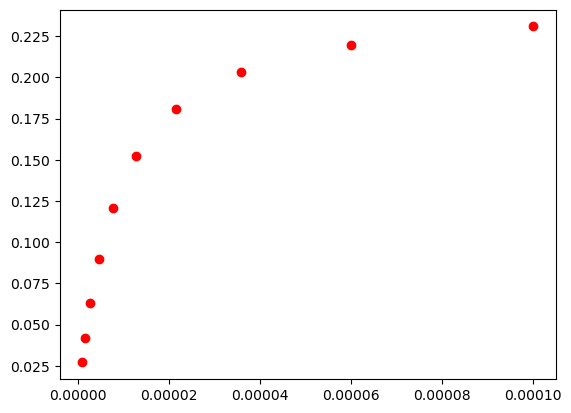

In [10]:
mask = np.array(ys)>=ymax/2


plt.plot(xs, ys, 'or')


[1.e-06]
R² = -3.4639760476066472


C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


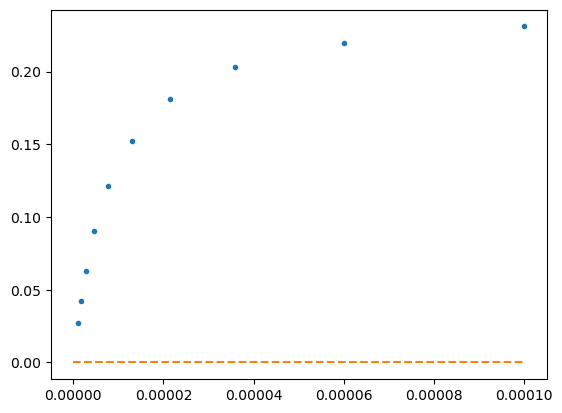

In [15]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

xs = np.array(xs)
ys = np.array(ys)

xs_fitted = np.linspace(0, xs[-1], num=100)

def func(x, Kd):
    return ymax*x*(Kd+x)

p0 = (1e-6)

params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
print(params)
# perform the fit
Kd = params[0]


# determine quality of the fit
squaredDiffs = np.square(ys - func(xs, Kd))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# inspect the parameters


plt.show()


In [14]:
Kd

13087.20290351075

In [16]:
xs

array([1.00000000e-06, 1.66810054e-06, 2.78255940e-06, 4.64158883e-06,
       7.74263683e-06, 1.29154967e-05, 2.15443469e-05, 3.59381366e-05,
       5.99484250e-05, 1.00000000e-04])